In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_blobs(n_samples=50, centers=2, random_state=0,cluster_std=0.6)

In [3]:
X

array([[ 1.41281595,  1.5303347 ],
       [ 1.81336135,  1.6311307 ],
       [ 1.43289271,  4.37679234],
       [ 1.87271752,  4.18069237],
       [ 2.09517785,  1.0791468 ],
       [ 2.73890793,  0.15676817],
       [ 3.18515794,  0.08900822],
       [ 2.06156753,  1.96918596],
       [ 2.03835818,  1.15466278],
       [-0.04749204,  5.47425256],
       [ 1.71444449,  5.02521524],
       [ 0.22459286,  4.77028154],
       [ 1.06923853,  4.53068484],
       [ 1.53278923,  0.55035386],
       [ 1.4949318 ,  3.85848832],
       [ 1.1641107 ,  3.79132988],
       [ 0.74387399,  4.12240568],
       [ 2.29667251,  0.48677761],
       [ 0.44359863,  3.11530945],
       [ 0.91433877,  4.55014643],
       [ 1.67467427,  0.68001896],
       [ 2.26908736,  1.32160756],
       [ 1.5108885 ,  0.9288309 ],
       [ 1.65179125,  0.68193176],
       [ 2.49272186,  0.97505341],
       [ 2.33812285,  3.43116792],
       [ 0.67047877,  4.04094275],
       [-0.55552381,  4.69595848],
       [ 2.16172321,

In [4]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

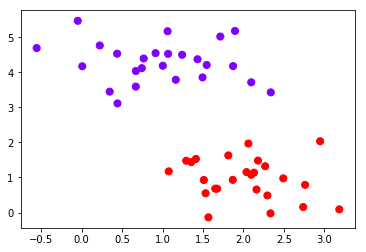

In [5]:
#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图


In [6]:
#获取平面上两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)
 
axisy,axisx = np.meshgrid(axisy,axisx)
#我们将使用这里形成的二维数组作为我们contour函数中的X和Y
#使用meshgrid函数将两个一维向量转换为特征矩阵
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标
 
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
#其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点
 
plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow")
 
 v1,v2 = np.meshgrid(a,b)
 
v1
 
v2
 
v = np.vstack([v1.ravel(), v2.ravel()]).T

IndentationError: unexpected indent (<ipython-input-6-3d6a798419f2>, line 20)

In [7]:
#建模，通过fit计算出对应的决策边界
#计算出对应的决策边界
Z = clf.decision_function(xy).reshape(axisx.shape)
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致

#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图
#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           ,alpha=0.5#透明度
           ,linestyles=["--","-","--"])
 
ax.set_xlim(xlim)#设置x轴取值
ax.set_ylim(ylim)



NameError: name 'clf' is not defined

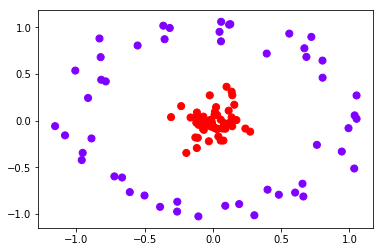

In [17]:
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.1)
 
X.shape
 
y.shape
 
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.show()

0.71

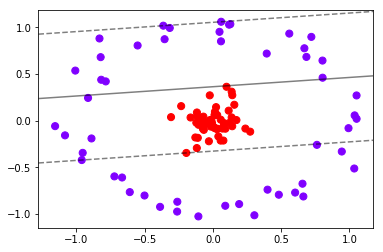

In [18]:
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)
clf.score(X,y)

In [23]:
#定义一个由x计算出来的新维度r
r = np.exp(-(X**2).sum(1))
 
rlim = np.linspace(min(r),max(r),100)
 
from mpl_toolkits import mplot3d
 
#定义一个绘制三维图像的函数
#elev表示上下旋转的角度
#azim表示平行旋转的角度
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
    

from ipywidgets import interact,fixed
interact(plot_3D,elev=[0,30,60,90],azip=(-180,180),X=fixed(X),y=fixed(y))
plt.show()


interactive(children=(Dropdown(description='elev', index=1, options=(0, 30, 60, 90), value=30), IntSlider(valu…

In [37]:
from numpy import *
import matplotlib.pyplot as plt
def loadDataSet(filename):
    dataMat=[]
    labelMat=[]
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [38]:
dataArr,labelArr = loadDataSet('testSet.txt')
data = array(dataArr)

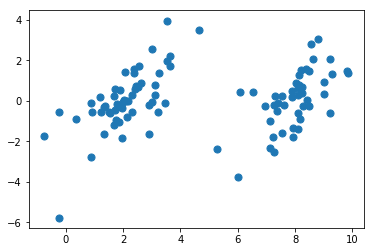

In [39]:
plt.scatter(data[:,0],data[:,1],s=50,cmap="rainbow")#rainbow彩虹色


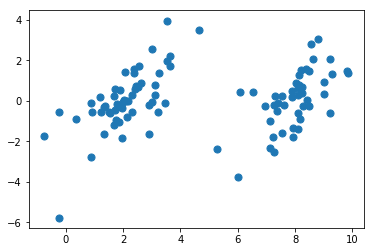

In [40]:
plt.scatter(data[:,0],data[:,1],s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

In [41]:
#获取平面上两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)
 
axisy,axisx = np.meshgrid(axisy,axisx)
#我们将使用这里形成的二维数组作为我们contour函数中的X和Y
#使用meshgrid函数将两个一维向量转换为特征矩阵
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标
 
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
#其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点

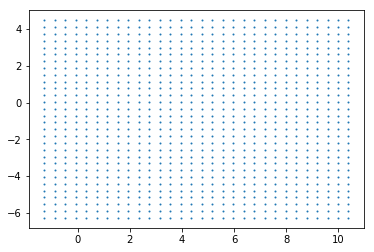

In [42]:
plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow")

#理解函数meshgrid和vstack的作用
a = np.array([1,2,3])
b = np.array([7,8])
v1,v2 = np.meshgrid(a,b)
#两两组合，会得到多少个坐标？
#答案是6个，分别是 (1,7),(2,7),(3,7),(1,8),(2,8),(3,8)
 
v1
 
v2
 
v = np.vstack([v1.ravel(), v2.ravel()]).T

(-6.271190845145907, 4.469429845145906)

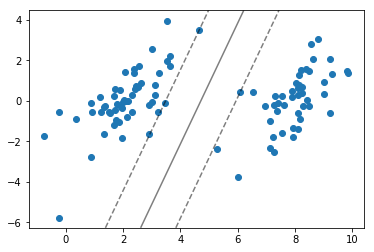

In [43]:
#建模，通过fit计算出对应的决策边界
clf = SVC(kernel = "linear").fit(data,labelArr)#计算出对应的决策边界
Z = clf.decision_function(xy).reshape(axisx.shape)
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致

#首先要有散点图
plt.scatter(data[:,0],data[:,1],cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图
#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           ,alpha=0.5#透明度
           ,linestyles=["--","-","--"])
 
ax.set_xlim(xlim)#设置x轴取值
ax.set_ylim(ylim)

In [44]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime

In [36]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data,labelArr,test_size=0.3,random_state=420)
 
Kernel = ["linear","poly","rbf","sigmoid"]
 
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
            # , degree = 1
             , cache_size=1000000#使用计算的内存，单位是MB，默认是200MB
            ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(time()-time0)

The accuracy under kernel linear is 1.000000
0.0009996891021728516
The accuracy under kernel poly is 1.000000
0.0009987354278564453
The accuracy under kernel rbf is 1.000000
0.002000093460083008
The accuracy under kernel sigmoid is 0.400000
0.0009987354278564453
